# Data Analysis

### Architecture:
**P300 Speller System**  
The P300 speller system allows users to communicate by focusing on characters within a 6x6 matrix. Rows and columns are randomly intensified to identify the user's target character. The program generates:
1. A blank matrix for initial reference.
2. A matrix with a random row and column highlighted to simulate intensification.
3. A matrix with the target character highlighted, showing the user's focus during the task.

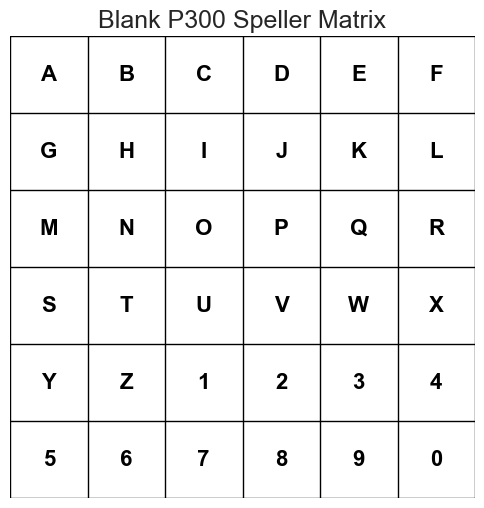

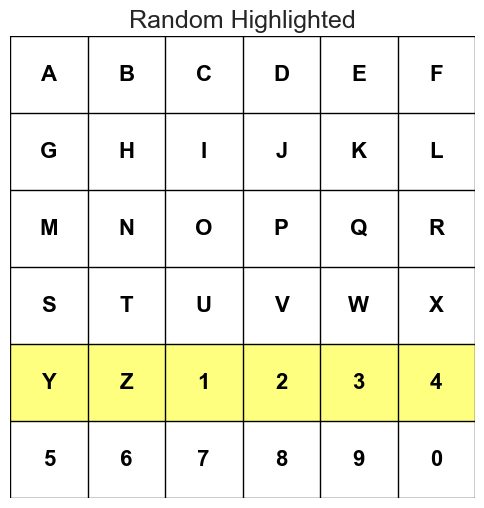

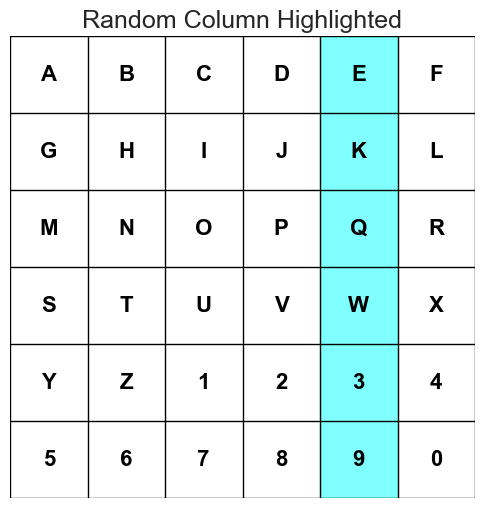

In [80]:
import random
from bundle.ImageCraft import *  

# 1. Blank matrix
create_p300_image(title="Blank P300 Speller Matrix")

# 2. Highlighted random row and column
highlight_row = random.randint(0, 5)
create_p300_image(highlight_row=highlight_row,
                  title="Random Highlighted")

# 3. Target character highlighted
target_col = random.randint(0, 5)
create_p300_image(highlight_col=target_col,
                  title="Random Column Highlighted")

### Data Collection

**Overview**  
Data was collected from two contributors, to evaluate the P300 speller system. Signals were bandpass filtered (0.1–60 Hz) and digitized at 240 Hz. Each session included multiple runs, during which subjects focused on characters in a word. The goal was to capture distinct P300 responses elicited by specific stimuli.

**Procedure**  
1. **Matrix Display**: Each run began with a blank 6x6 matrix displayed for 2.5 seconds.
2. **Intensification**:
   - Rows and columns were randomly highlighted for 100 ms each.
   - A 75 ms blank period followed each intensification.
   - Intensifications occurred in blocks of 12 (6 rows and 6 columns), repeated 15 times per character epoch.
   - In total, 180 intensifications were performed for each character epoch.
3. **Character Completion**:
   - After completing intensifications for a character, the matrix was blank for 2.5 seconds.
   - During this time, the next character in the target word was displayed, with the current focus character highlighted in parentheses.


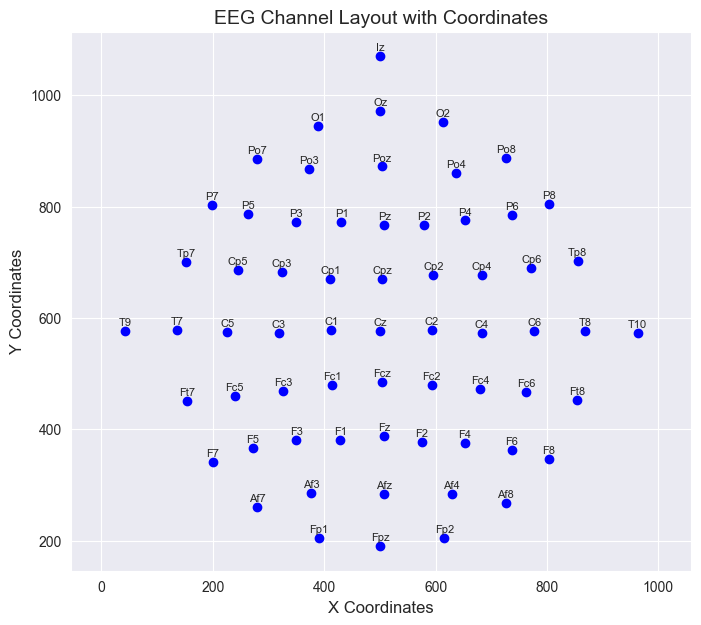

In [81]:
import matplotlib.pyplot as plt
import pandas as pd

# Load coordinates and channel names from CSV files
coordinates_file = "../../data/coordinates.csv"
channels_file = "../../data/channels.csv"

coordinates = pd.read_csv(coordinates_file, header=None, names=["x", "y"])
channels = pd.read_csv(channels_file, header=None, names=["channel"])

# Ensure coordinates and channels align
if len(coordinates) != len(channels):
    raise ValueError("The number of coordinates does not match the number of channels.")

# Plot the coordinates
plt.figure(figsize=(8, 7))
plt.scatter(coordinates["x"], coordinates["y"], color="blue", marker="o")

# Annotate each point with its channel name
for (x, y), channel in zip(coordinates.values, channels["channel"]):
    plt.text(x, y + 10, channel, fontsize=8, ha="center")

# Set plot labels and title
plt.title("EEG Channel Layout with Coordinates", fontsize=14)
plt.xlabel("X Coordinates", fontsize=12)
plt.ylabel("Y Coordinates", fontsize=12)
plt.grid(True)
plt.axis("equal")

# Show the plot
plt.show()

### Data 

#### 1. **Data Structure and Format**:
   - The dataset is stored in **MATLAB `.mat` files**.
   - There are **four files** in total: 
     - **Two training files**: One for Contributor I and one for Contributor II.
     - **Two test files**: One for Contributor I and one for Contributor II.
   - The training set contains data from **85 characters**, and the test set contains data from **100 characters** for each subject. These characters might represent the letters or symbols the subjects were trying to spell out during the EEG recording sessions.

#### 2. **Data Organization**:
   - The EEG data is stored in a **64-channel signal matrix** for each trial or epoch. This means that each row in the matrix represents the signal from one of the **64 EEG channels**, and the columns represent the **data points** in time for each trial.
   - The matrix is stored in a variable called `Signal`. This suggests that **each trial's data is a 64 x N matrix**, where **N** is the number of time samples per trial.

In [82]:
import os
from scipy.io import loadmat

# Settings
contributor_names = ["I", "II"]
data_types = ["Train", "Test"]
results = []

for contributor in contributor_names:
    for data_type in data_types:
        print(f"Processing Contributor {contributor} - {data_type} data")
        file_path = f'../../data/Contributor_{contributor}_{data_type}.mat'

        # Check if the file exists
        if not os.path.exists(file_path):
            print(f"File not found: {file_path}")
            continue

        # Load the required data
        data = loadmat(file_path)

        # Get the variables of interest from the loaded dictionary
        signals = data['Signal']
        flashing = data['Flashing']
        stimulus = data.get('StimulusType', None)  # StimulusType may not exist in Test data
        word = data.get('TargetChar', None)  # TargetChar may not exist in Test data

        SAMPLING_FREQUENCY = 240
        REPETITIONS = 15

        # Compute the duration of the recording in minutes
        RECORDING_DURATION = (len(signals)) * (len(signals[0])) / (SAMPLING_FREQUENCY * 60)
        # Compute number of trials (if word exists)
        TRIALS = len(word[0]) if word is not None else "N/A"

        # Store results for visualization
        results.append({
            'Contributor': contributor,
            'DataType': data_type,
            'SamplingFrequency': SAMPLING_FREQUENCY,
            'RecordingDuration': RECORDING_DURATION,
            'Trials': TRIALS,
            'SpelledWord': ''.join(word) if word is not None else "N/A"
        })


# Print results in a table format
print("\nSummary of Results:\n")
print("{:<15} {:<10} {:<20} {:<20} {:<10} {:<30}".format(
    "Contributor", "Type", "Sampling Freq. (Hz)", "Recording (min)", "Trials", "Spelled Word"
))
print("=" * 110)
for result in results:
    # Break the Spelled Word into chunks of 30 characters
    word_chunks = [result['SpelledWord'][i:i+30] for i in range(0, len(result['SpelledWord']), 30)]
    
    # Print the first line of the row
    print("{:<15} {:<10} {:<20} {:<20} {:<10} {:<30}".format(
        result['Contributor'],
        result['DataType'],
        result['SamplingFrequency'],
        "{:.2f}".format(result['RecordingDuration']),
        result['Trials'],
        word_chunks[0] if word_chunks else ""
    ))

    # Print the remaining lines for the Spelled Word, if any
    for chunk in word_chunks[1:]:
        print("{:<15} {:<10} {:<20} {:<20} {:<10} {:<30}".format(
            "", "", "", "", "", chunk
        ))
    
    print()
    

Processing Contributor I - Train data
Processing Contributor I - Test data
Processing Contributor II - Train data
Processing Contributor II - Test data

Summary of Results:

Contributor     Type       Sampling Freq. (Hz)  Recording (min)      Trials     Spelled Word                  
I               Train      240                  46.01                85         EAEVQTDOJG8RBRGONCEDHCTUIDBPUH
                                                                                MEM6OUXOCFOUKWA4VJEFRZROLHYNQD
                                                                                W_EKTLBWXEPOUIKZERYOOTHQI     

I               Test       240                  54.12                100        WQXPLZCOMRKO97YFZDEZ1DPI9NNVGR
                                                                                QDJCUVRMEUOOOJD2UFYPOO6J7LDGYE
                                                                                GOA5VHNEHBTXOO1TDOILUEE5BFAEEX
                                                